<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/Differentiated%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
install.packages(c("tidyverse"), dependencies = TRUE)
install.packages(c("magrittr"), dependencies = TRUE)
install.packages(c("cluster"), dependencies = TRUE)
install.packages(c("cluster.datasets"), dependencies = TRUE)
install.packages(c("cowplot"), dependencies = TRUE)
install.packages(c("NbClust"), dependencies = TRUE)
install.packages(c("clValid"), dependencies = TRUE)
install.packages(c("ggfortify"), dependencies = TRUE)
install.packages(c("clustree"), dependencies = TRUE)
install.packages(c("dendextend"), dependencies = TRUE)
install.packages(c("car"), dependencies = TRUE)
install.packages(c("factoextra"), dependencies = TRUE)
install.packages(c("FactoMineR"), dependencies = TRUE)
install.packages(c("corrplot"), dependencies = TRUE)
install.packages(c("GGally"), dependencies = TRUE)
install.packages(c("ggiraphExtra"), dependencies = TRUE)
install.packages(c("knitr"), dependencies = TRUE)
install.packages(c("kableExtra"), dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘covr’, ‘feather’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘formatR’, ‘proxy’, ‘lambda.r’, ‘futile.options’, ‘e1071’, ‘textshaping’, ‘futile.logger’, ‘Cairo’, ‘gridGraphics’, ‘magick’, ‘maps’, ‘PASWR’, ‘patchwork’, ‘ragg’, ‘vdiffr’, ‘VennDiagram’


Warning message in install.packages(c("cowplot"), dependencies = TRUE):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages(c("cowplot"), dependencies = TRUE):
“installation of package ‘Cairo’ had non-zero exit status”
Warning message in ins

In [29]:
library(tidyverse)
library(magrittr)
library(cluster)
library(cluster.datasets)
library(cowplot)
library(NbClust)
library(clValid)
library(ggfortify)
library(clustree)
library(dendextend)
library(factoextra)
library(FactoMineR)
library(corrplot)
library(GGally)
library(ggiraphExtra)
library(knitr)
library(kableExtra)

Loading required package: ggraph


---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

corrplot 0.90 loaded

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [78]:
data("all.mammals.milk.1956")
raw_mammals <- all.mammals.milk.1956
# subset dataset
mammals <- raw_mammals %>% select(-name) # set rownames
mammals <- as_tibble(mammals)

In [79]:
# Glimpse the data set
glimpse(mammals)

Rows: 25
Columns: 5
$ water   <dbl> 90.1, 88.5, 88.4, 90.3, 90.4, 87.7, 86.9, 82.1, 81.9, 81.6, 81…
$ protein <dbl> 2.6, 1.4, 2.2, 1.7, 0.6, 3.5, 4.8, 5.9, 7.4, 10.1, 6.6, 3.9, 2…
$ fat     <dbl> 1.0, 3.5, 2.7, 1.4, 4.5, 3.4, 1.7, 7.9, 7.2, 6.3, 5.9, 3.2, 1.…
$ lactose <dbl> 6.9, 6.0, 6.4, 6.2, 4.4, 4.8, 5.7, 4.7, 2.7, 4.4, 4.9, 5.6, 5.…
$ ash     <dbl> 0.35, 0.24, 0.18, 0.40, 0.10, 0.71, 0.90, 0.78, 0.85, 0.75, 0.…


In [80]:
colnames(mammals) <- c("V1", "V2", "V3", "V4", "V5")

In [81]:
# Glimpse the data set
glimpse(mammals)

Rows: 25
Columns: 5
$ V1 <dbl> 90.1, 88.5, 88.4, 90.3, 90.4, 87.7, 86.9, 82.1, 81.9, 81.6, 81.6, 8…
$ V2 <dbl> 2.6, 1.4, 2.2, 1.7, 0.6, 3.5, 4.8, 5.9, 7.4, 10.1, 6.6, 3.9, 2.0, 7…
$ V3 <dbl> 1.0, 3.5, 2.7, 1.4, 4.5, 3.4, 1.7, 7.9, 7.2, 6.3, 5.9, 3.2, 1.8, 5.…
$ V4 <dbl> 6.9, 6.0, 6.4, 6.2, 4.4, 4.8, 5.7, 4.7, 2.7, 4.4, 4.9, 5.6, 5.5, 3.…
$ V5 <dbl> 0.35, 0.24, 0.18, 0.40, 0.10, 0.71, 0.90, 0.78, 0.85, 0.75, 0.93, 0…


In [82]:
head(mammals)


V1,V2,V3,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
90.1,2.6,1.0,6.9,0.35
88.5,1.4,3.5,6.0,0.24
88.4,2.2,2.7,6.4,0.18
90.3,1.7,1.4,6.2,0.40
90.4,0.6,4.5,4.4,0.10
87.7,3.5,3.4,4.8,0.71


In [159]:
mammals

V1,V2,V3,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.12,33.94,10.45,3.05,4.22
22.83,34.98,10.99,3.09,4.63
24.75,37.83,10.67,3.25,4.39
26.84,38.65,10.67,3.48,4.26
25.40,34.20,10.71,3.78,4.98
26.87,36.79,9.40,3.73,4.92
22.70,33.04,10.74,3.87,4.32
25.05,36.69,9.13,3.64,4.72
23.09,34.72,10.21,3.31,4.02


In [160]:
library(dplyr)

In [192]:
#replaces the negetive numbers with zeros
mammals$V5 <- c(4.22,4.63,4.39,4.26,4.98,4.92,4.59,4.27,4.27,4.92,4.81,4.38,4.81,4.68,4.58,4.52,4.74,4.79,4.80,4.17,5.00)

In [162]:
#drop columns
#mammals= subset(mammals, select = -c(V5) )

In [193]:
mammals

V1,V2,V3,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.12,33.94,10.45,3.05,4.22
22.83,34.98,10.99,3.09,4.63
24.75,37.83,10.67,3.25,4.39
26.84,38.65,10.67,3.48,4.26
25.40,34.20,10.71,3.78,4.98
26.87,36.79,9.40,3.73,4.92
22.70,33.04,10.74,3.87,4.59
25.05,36.69,9.13,3.64,4.27
23.09,34.72,10.21,3.31,4.27


In [194]:
mammals

V1,V2,V3,V4,V5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.12,33.94,10.45,3.05,4.22
22.83,34.98,10.99,3.09,4.63
24.75,37.83,10.67,3.25,4.39
26.84,38.65,10.67,3.48,4.26
25.40,34.20,10.71,3.78,4.98
26.87,36.79,9.40,3.73,4.92
22.70,33.04,10.74,3.87,4.59
25.05,36.69,9.13,3.64,4.27
23.09,34.72,10.21,3.31,4.27


In [195]:
#mammals = mammals[-12,]

In [196]:
# Glimpse the data set
glimpse(mammals)

Rows: 21
Columns: 5
$ V1 <dbl> 21.12, 22.83, 24.75, 26.84, 25.40, 26.87, 22.70, 25.05, 23.09, 26.8…
$ V2 <dbl> 33.94, 34.98, 37.83, 38.65, 34.20, 36.79, 33.04, 36.69, 34.72, 34.9…
$ V3 <dbl> 10.45, 10.99, 10.67, 10.67, 10.71, 9.40, 10.74, 9.13, 10.21, 10.92,…
$ V4 <dbl> 3.05, 3.09, 3.25, 3.48, 3.78, 3.73, 3.87, 3.64, 3.31, 3.79, 3.50, 3…
$ V5 <dbl> 4.22, 4.63, 4.39, 4.26, 4.98, 4.92, 4.59, 4.27, 4.27, 4.92, 4.81, 4…


In [197]:
# Summary of data set
summary(mammals) 

       V1              V2              V3              V4       
 Min.   :21.12   Min.   :32.08   Min.   : 8.63   Min.   :2.310  
 1st Qu.:23.09   1st Qu.:34.72   1st Qu.: 9.40   1st Qu.:3.150  
 Median :24.34   Median :35.19   Median :10.21   Median :3.480  
 Mean   :24.44   Mean   :35.87   Mean   :10.04   Mean   :3.421  
 3rd Qu.:25.51   3rd Qu.:37.82   3rd Qu.:10.67   3rd Qu.:3.730  
 Max.   :26.87   Max.   :39.94   Max.   :10.99   Max.   :3.980  
       V5       
 Min.   :4.170  
 1st Qu.:4.380  
 Median :4.630  
 Mean   :4.606  
 3rd Qu.:4.810  
 Max.   :5.000  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



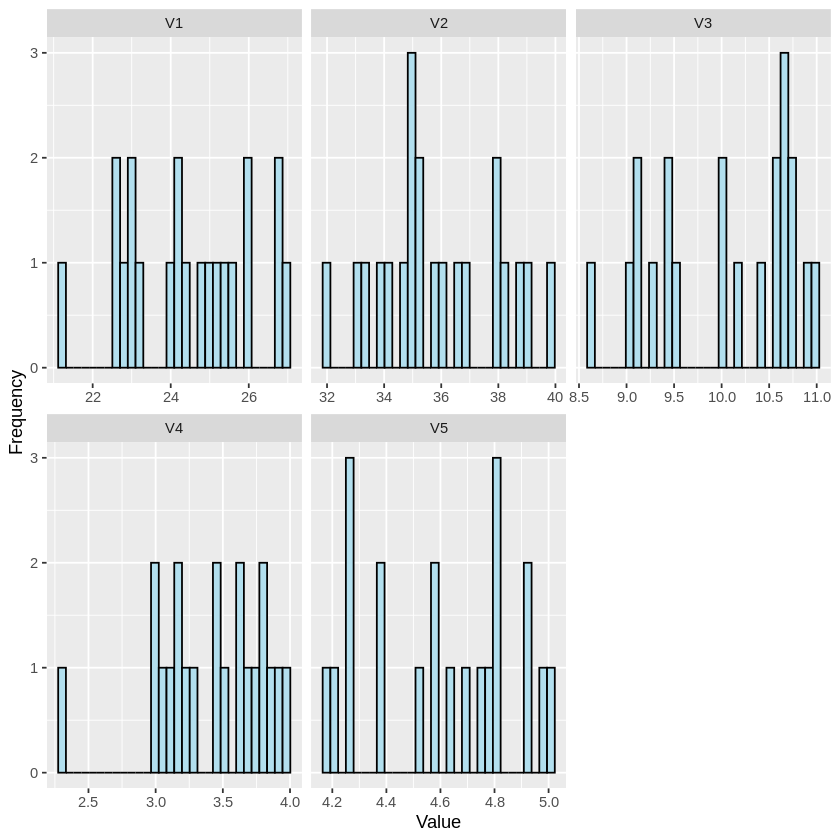

In [198]:
# Historgram for each attribute
mammals %>% 
  gather(Attributes, value, 1:5) %>% 
  ggplot(aes(x=value)) +
  geom_histogram(fill = "lightblue2", color = "black") + 
  facet_wrap(~Attributes, scales = "free_x") +
  labs(x = "Value", y = "Frequency")

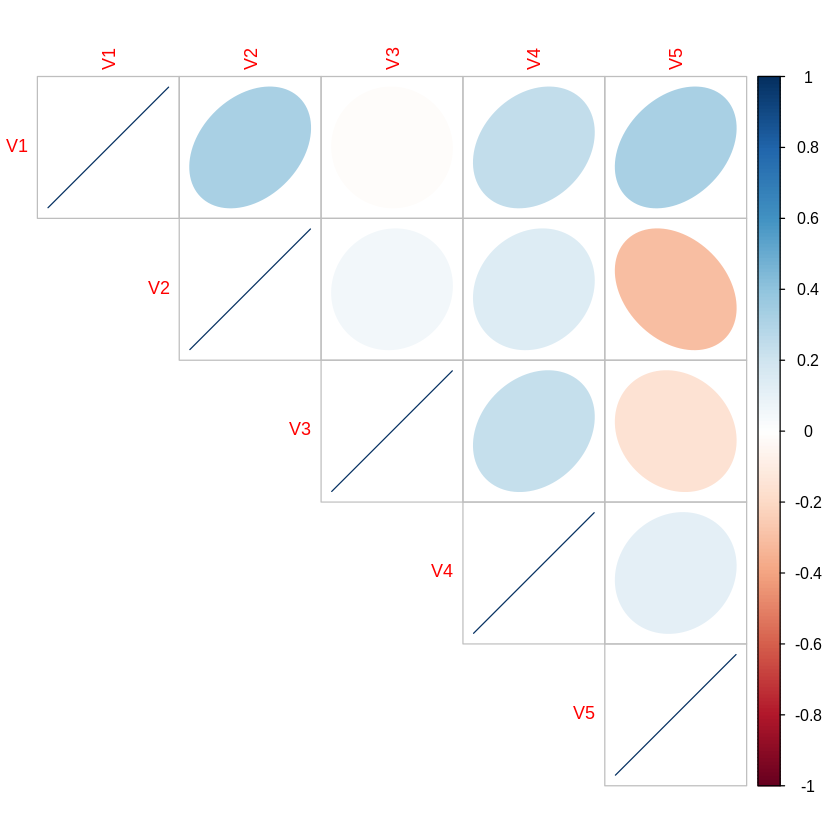

In [199]:
corrplot(cor(mammals), type = "upper", method = "ellipse", tl.cex = 0.9)

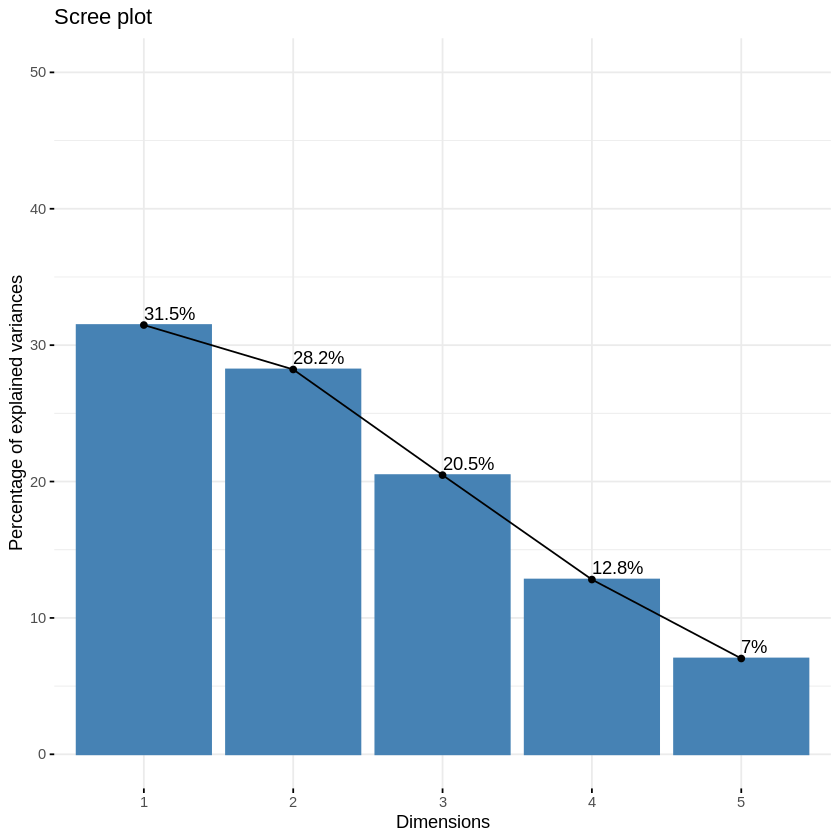

In [200]:
res.pca <- PCA(mammals_scaled,  graph = FALSE)
# Visualize eigenvalues/variances
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

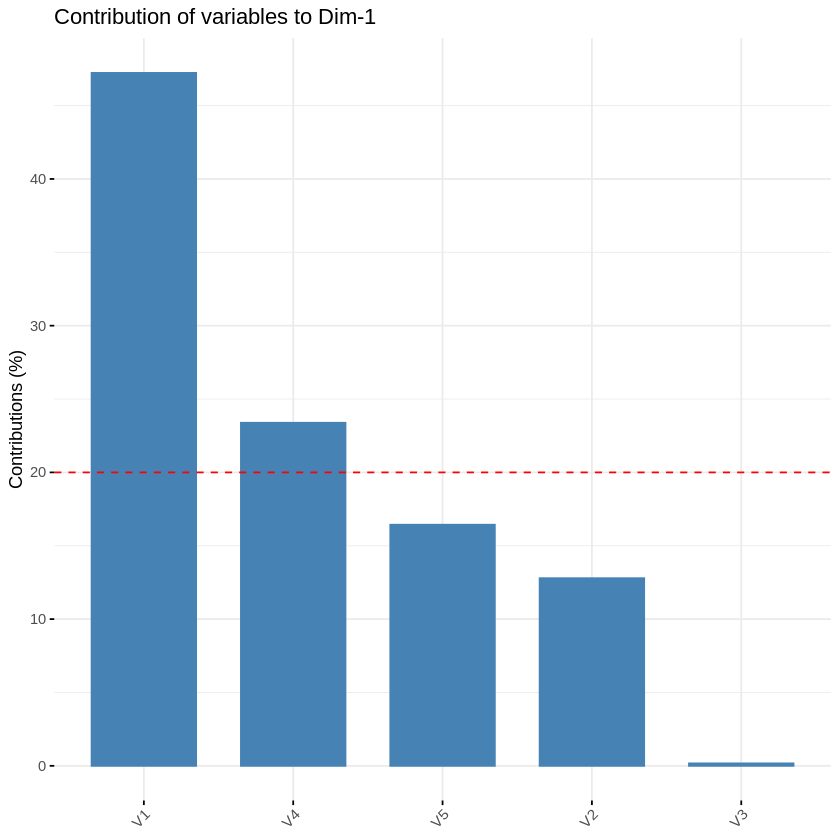

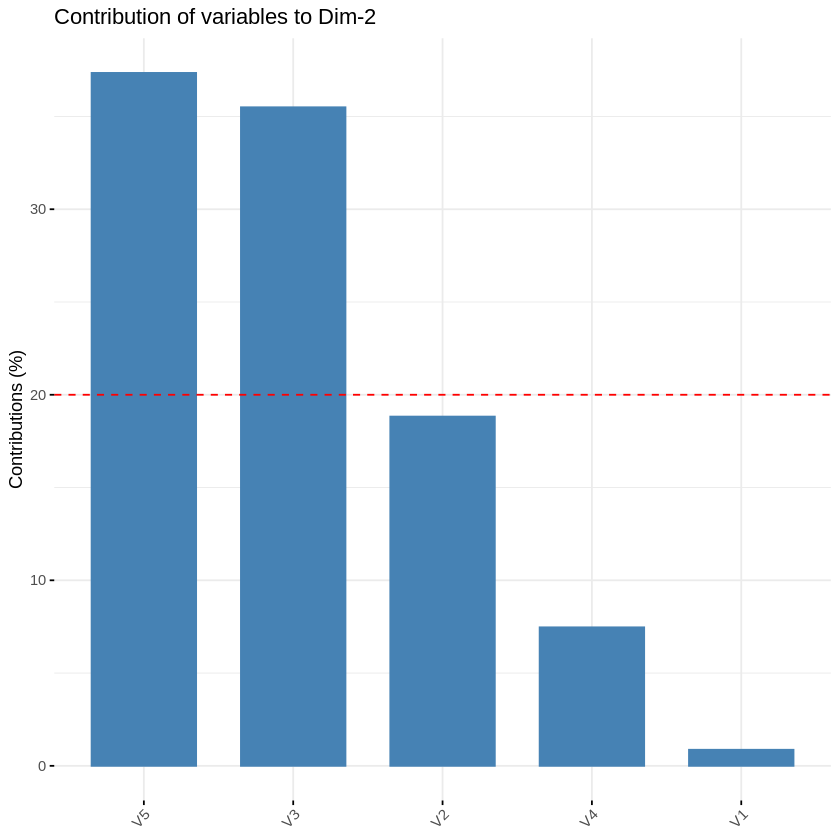

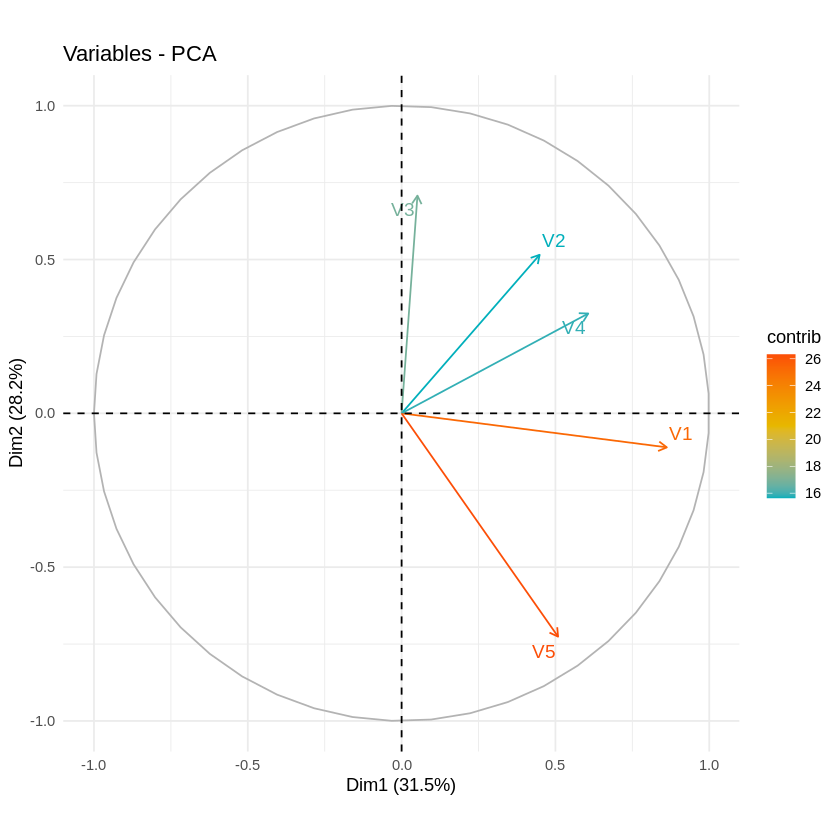

In [201]:
# Extract the results for variables
var <- get_pca_var(res.pca)
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
# Control variable colors using their contributions to the principle axis
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
             ) + theme_minimal() + ggtitle("Variables - PCA")

In [202]:
km2 <- kmeans(mammals_scaled, centers = 2, nstart = 30)

Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”
Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”
Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”
Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”
Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”
Warning message:
“argument frame is deprecated; please use ellipse instead.”
Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”


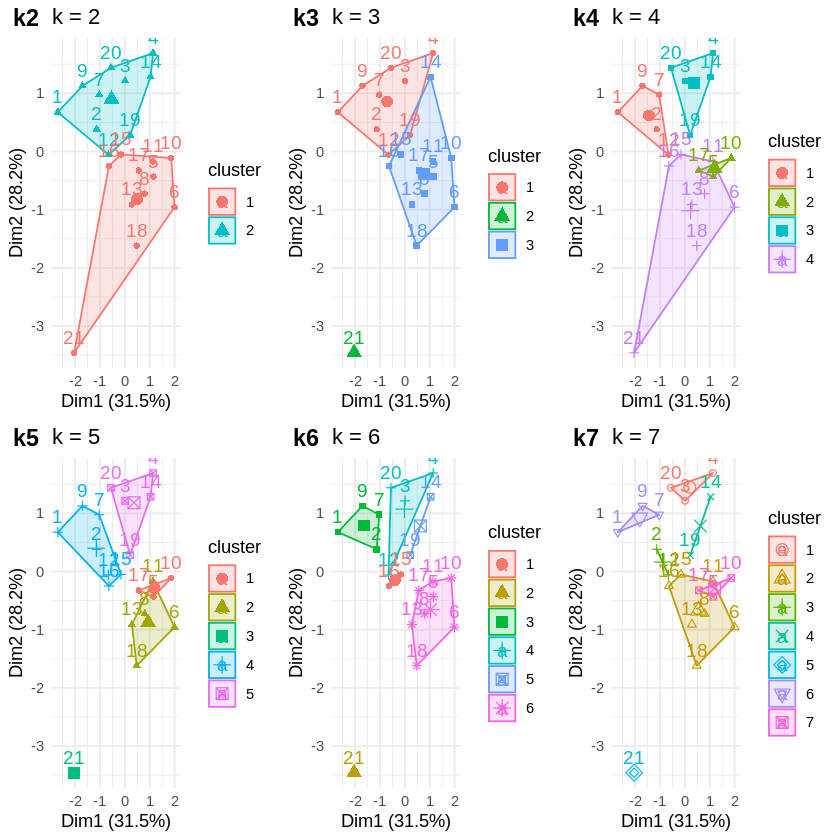

In [203]:
kmean_calc <- function(df, ...){
  kmeans(df, scaled = ..., nstart = 30)
}
km2 <- kmean_calc(mammals_scaled, 2)
km3 <- kmean_calc(mammals_scaled, 3)
km4 <- kmeans(mammals_scaled, 4)
km5 <- kmeans(mammals_scaled, 5)
km6 <- kmeans(mammals_scaled, 6)
km7 <- kmeans(mammals_scaled, 7)
km8 <- kmeans(mammals_scaled, 8)
km9 <- kmeans(mammals_scaled, 9)
km10 <- kmeans(mammals_scaled, 10)
km11 <- kmeans(mammals_scaled, 11)
p1 <- fviz_cluster(km2, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 2") 
p2 <- fviz_cluster(km3, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 3")
p3 <- fviz_cluster(km4, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 4")
p4 <- fviz_cluster(km5, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 5")
p5 <- fviz_cluster(km6, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 6")
p6 <- fviz_cluster(km7, data = mammals_scaled, frame.type = "convex") + theme_minimal() + ggtitle("k = 7")
plot_grid(p1, p2, p3, p4, p5, p6, labels = c("k2", "k3", "k4", "k5", "k6", "k7"))

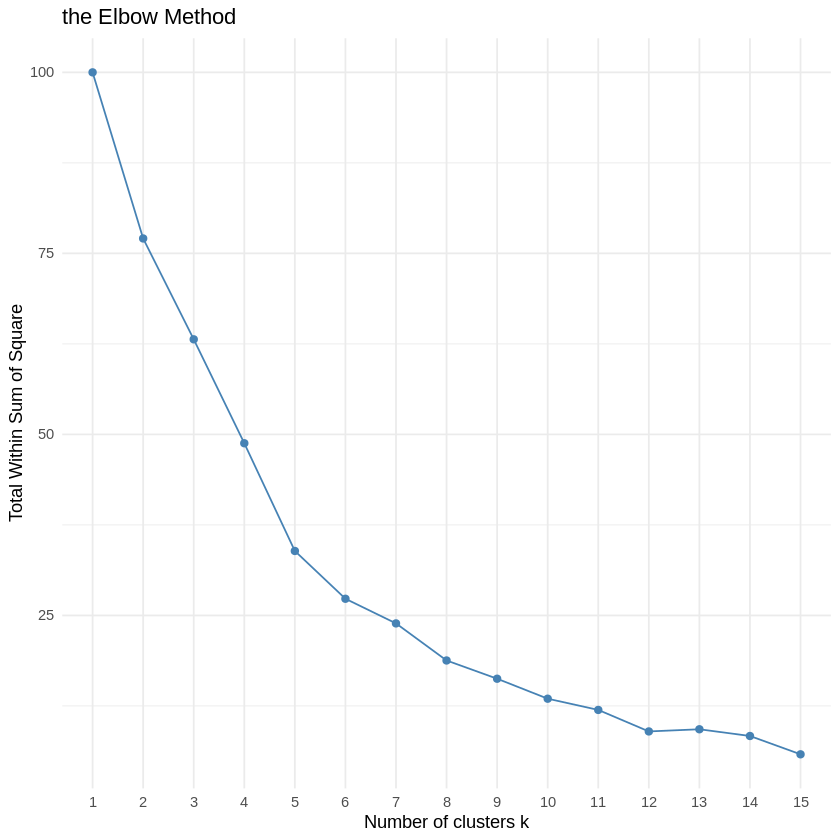

In [224]:
set.seed(31)
# function to compute total within-cluster sum of squares
fviz_nbclust(mammals_scaled, kmeans, method = "wss", k.max = 15) + theme_minimal() + ggtitle("the Elbow Method")

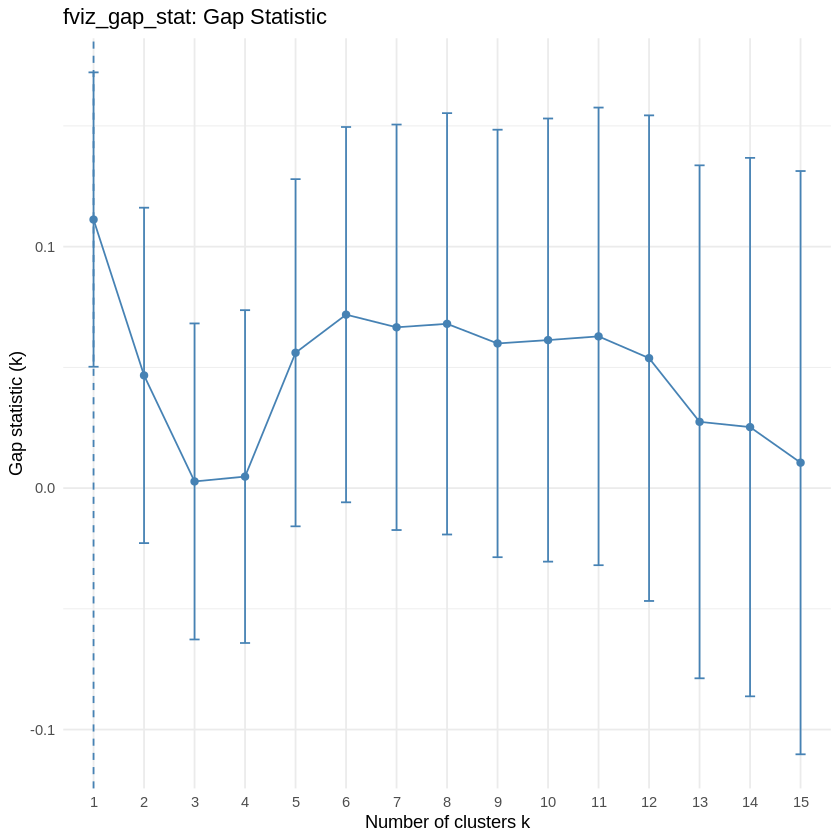

In [225]:
gap_stat <- clusGap(mammals_scaled, FUN = kmeans, nstart = 30, K.max = 15, B = 50)
fviz_gap_stat(gap_stat) + theme_minimal() + ggtitle("fviz_gap_stat: Gap Statistic")

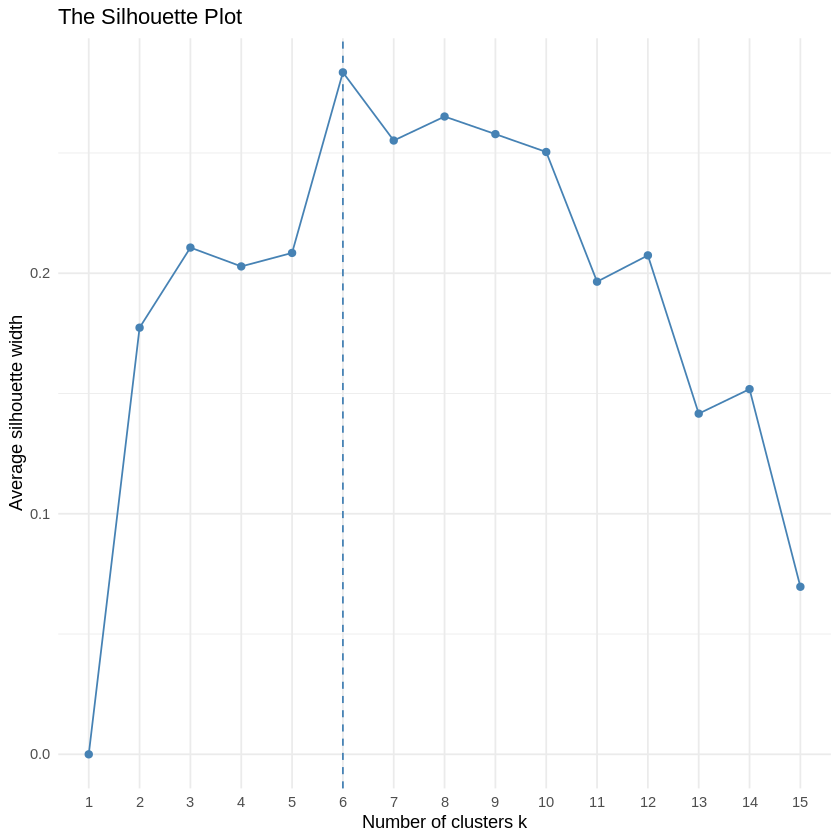

In [227]:
fviz_nbclust(mammals_scaled, kmeans, method = "silhouette", k.max = 15) + theme_minimal() + ggtitle("The Silhouette Plot")

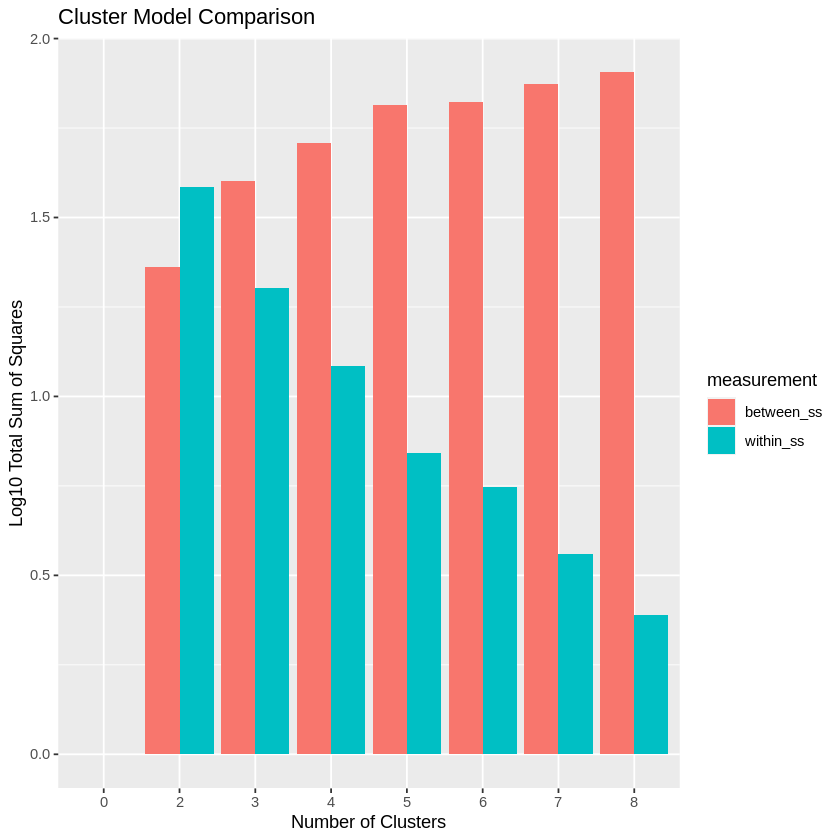

In [228]:
ssc <- data.frame(
  kmeans = c(2,3,4,5,6,7,8),
  within_ss = c(mean(km2$withinss), mean(km3$withinss), mean(km4$withinss), mean(km5$withinss), mean(km6$withinss), mean(km7$withinss), mean(km8$withinss)),
  between_ss = c(km2$betweenss, km3$betweenss, km4$betweenss, km5$betweenss, km6$betweenss, km7$betweenss, km8$betweenss)
)
ssc %<>% gather(., key = "measurement", value = value, -kmeans)
#ssc$value <- log10(ssc$value)
ssc %>% ggplot(., aes(x=kmeans, y=log10(value), fill = measurement)) + geom_bar(stat = "identity", position = "dodge") + ggtitle("Cluster Model Comparison") + xlab("Number of Clusters") + ylab("Log10 Total Sum of Squares") + scale_x_discrete(name = "Number of Clusters", limits = c("0", "2", "3", "4", "5", "6", "7", "8"))

Warning message in pf(beale, pp, df2):
“NaNs produced”


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


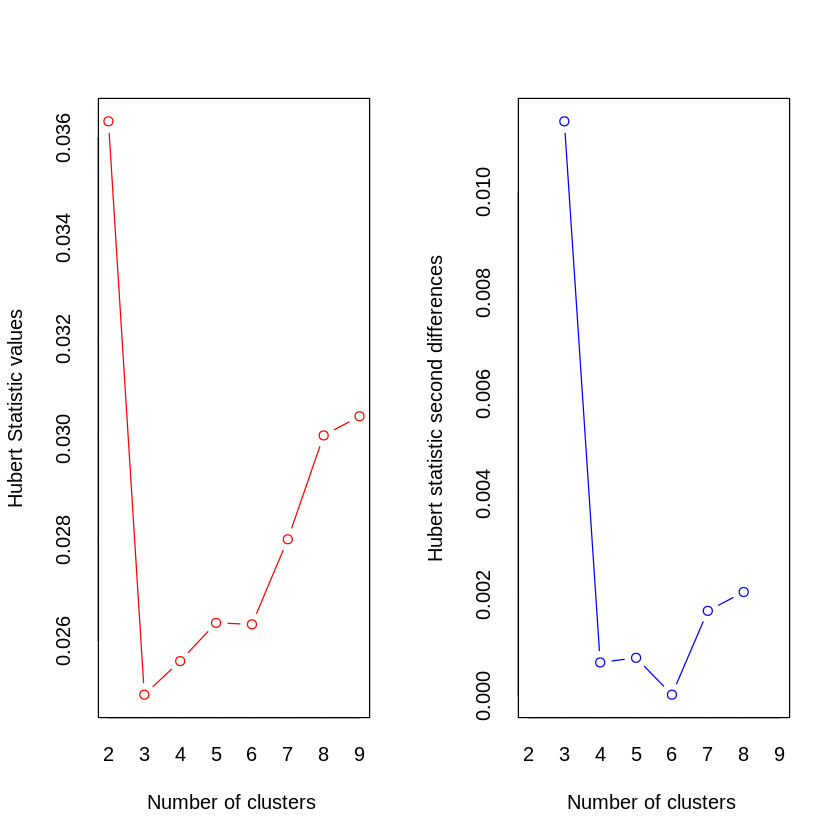

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 5 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 3 proposed 6 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "matrix") .viz_NbClust(x, print.summary, :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(best_nc) == "matrix") {:
“the condition has length > 1 and only the first element will be used”


Among all indices: 
* 2 proposed  0 as the best number of clusters
* 9 proposed  2 as the best number of clusters
* 5 proposed  3 as the best number of clusters
* 1 proposed  4 as the best number of clusters
* 3 proposed  5 as the best number of clusters
* 3 proposed  6 as the best number of clusters
* 1 proposed  7 as the best number of clusters
* 2 proposed  9 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  2 .



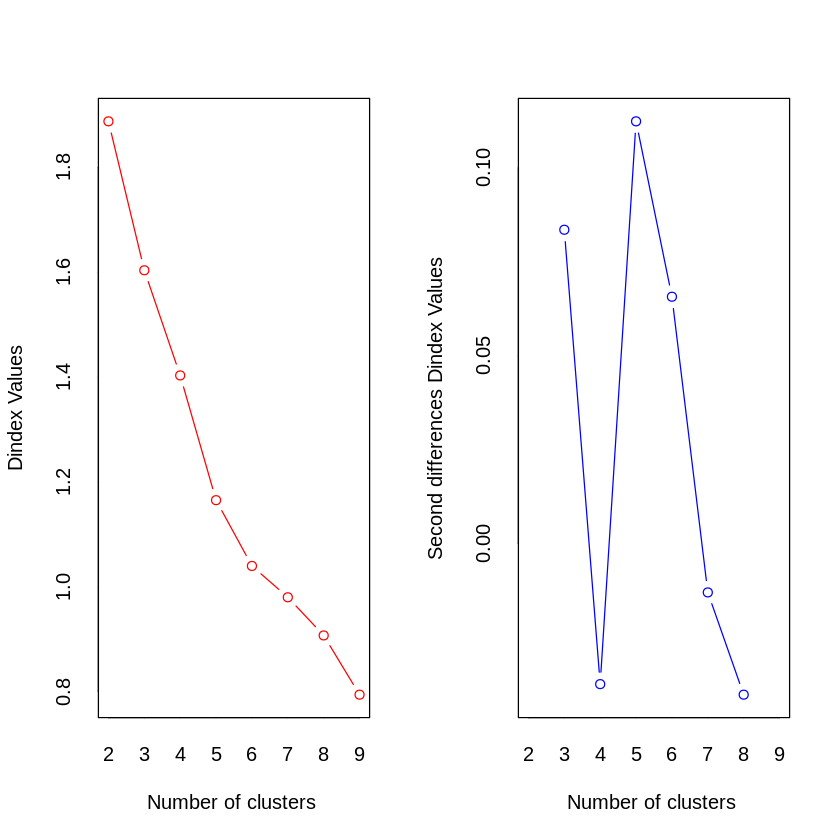

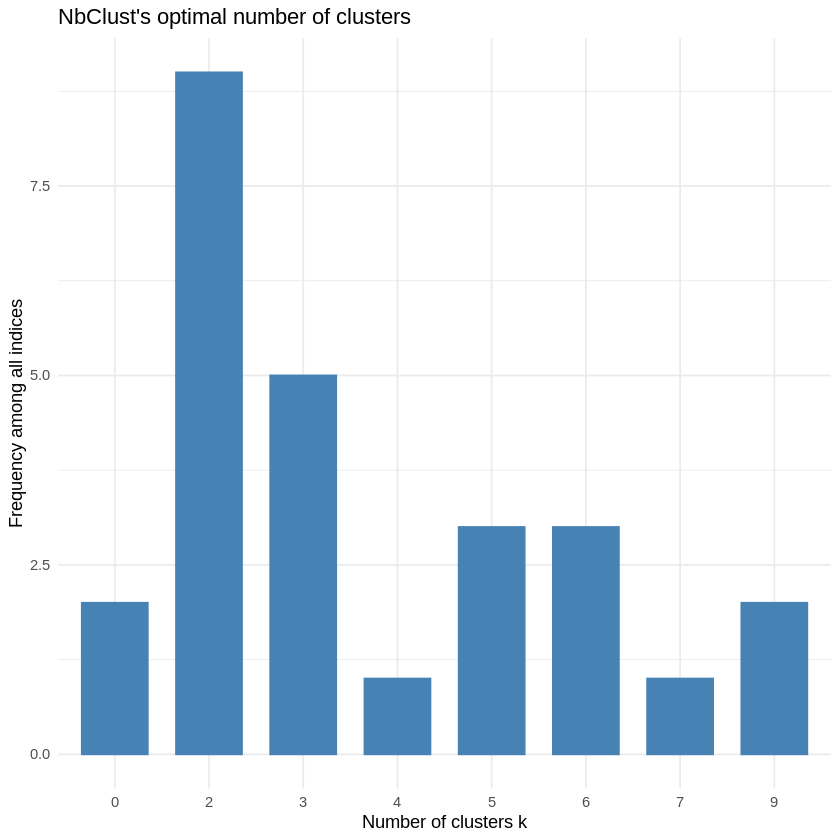

In [229]:
res.nbclust <- NbClust(mammals_scaled, distance = "euclidean",
                  min.nc = 2, max.nc = 9, 
                  method = "complete", index ="all")
factoextra::fviz_nbclust(res.nbclust) + theme_minimal() + ggtitle("NbClust's optimal number of clusters")

Warning message in tmp[k] <- kmeans(mammals_scaled, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(mammals_scaled, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(mammals_scaled, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(mammals_scaled, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(mammals_scaled, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(mammals_scaled, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmeans(mammals_scaled, k, nstart = 30):
“number of items to replace is not a multiple of replacement length”
Warning message in tmp[k] <- kmean

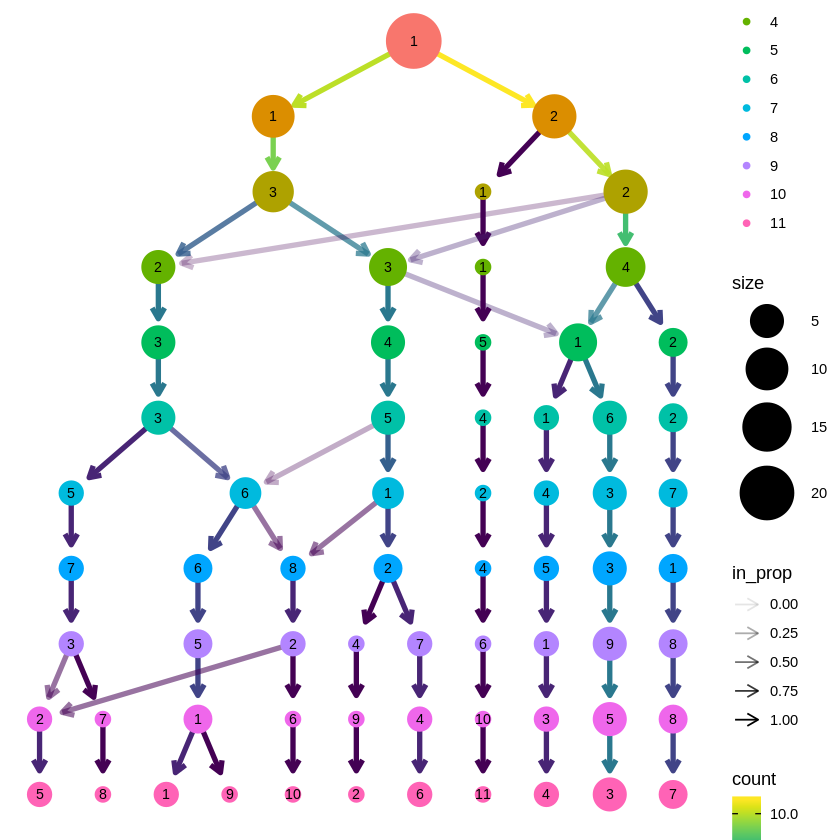

In [230]:
tmp <- NULL
for (k in 1:11){
  tmp[k] <- kmeans(mammals_scaled, k, nstart = 30)
}
df <- data.frame(tmp)
# add a prefix to the column names
colnames(df) <- seq(1:11)
colnames(df) <- paste0("k",colnames(df))
# get individual PCA
df.pca <- prcomp(df, center = TRUE, scale. = FALSE)
ind.coord <- df.pca$x
ind.coord <- ind.coord[,1:2]
df <- bind_cols(as.data.frame(df), as.data.frame(ind.coord))
clustree(df, prefix = "k")

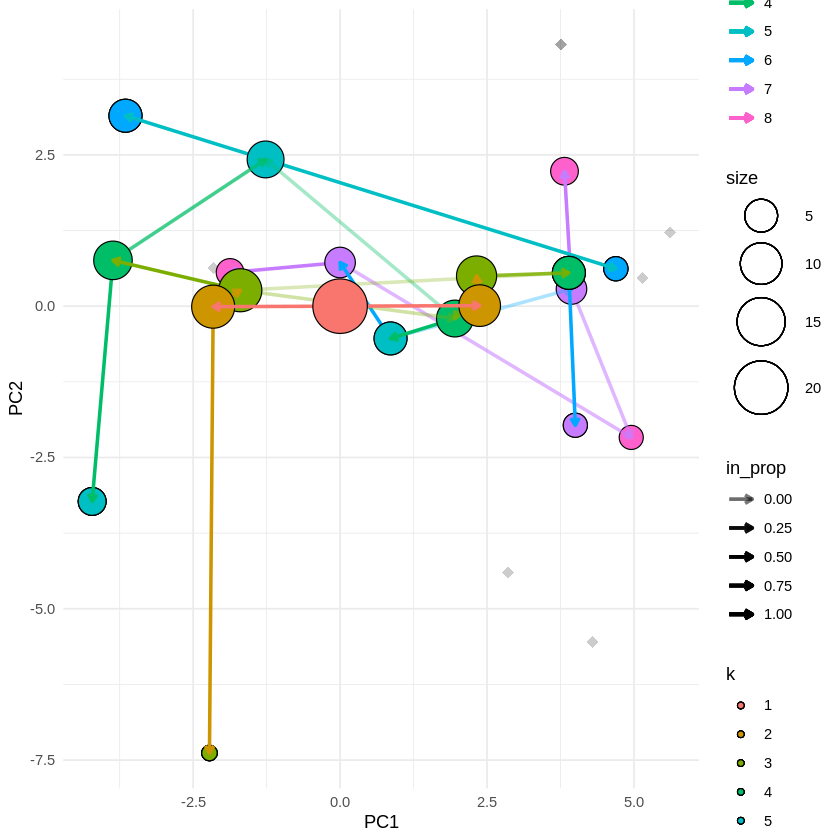

In [231]:
df_subset <- df %>% select(1:8,12:13)
clustree_overlay(df_subset, prefix = "k", x_value = "PC1", y_value = "PC2")

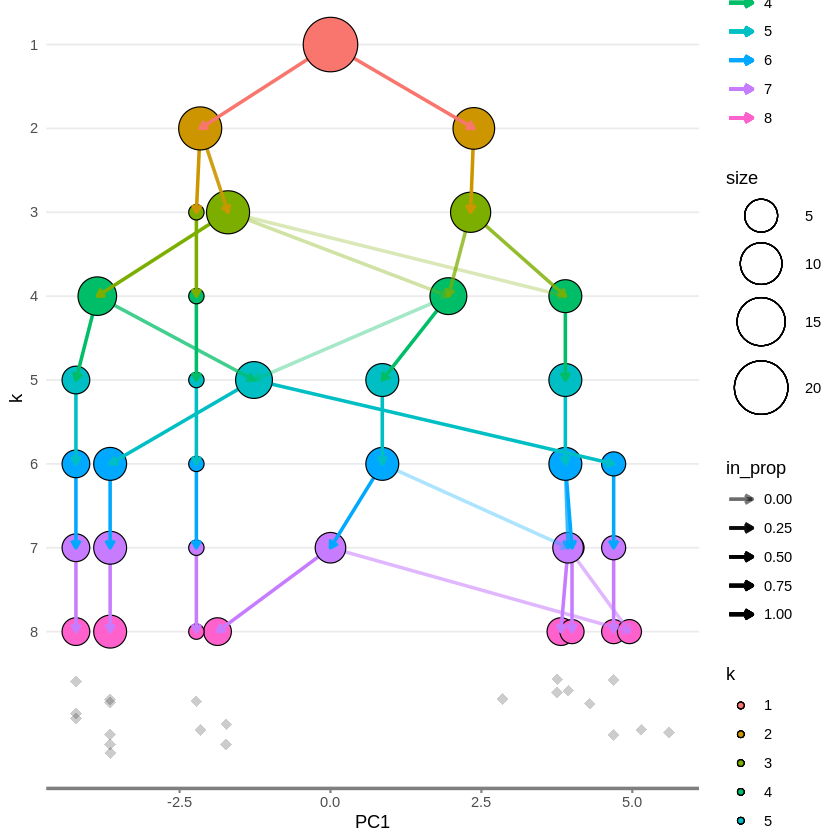

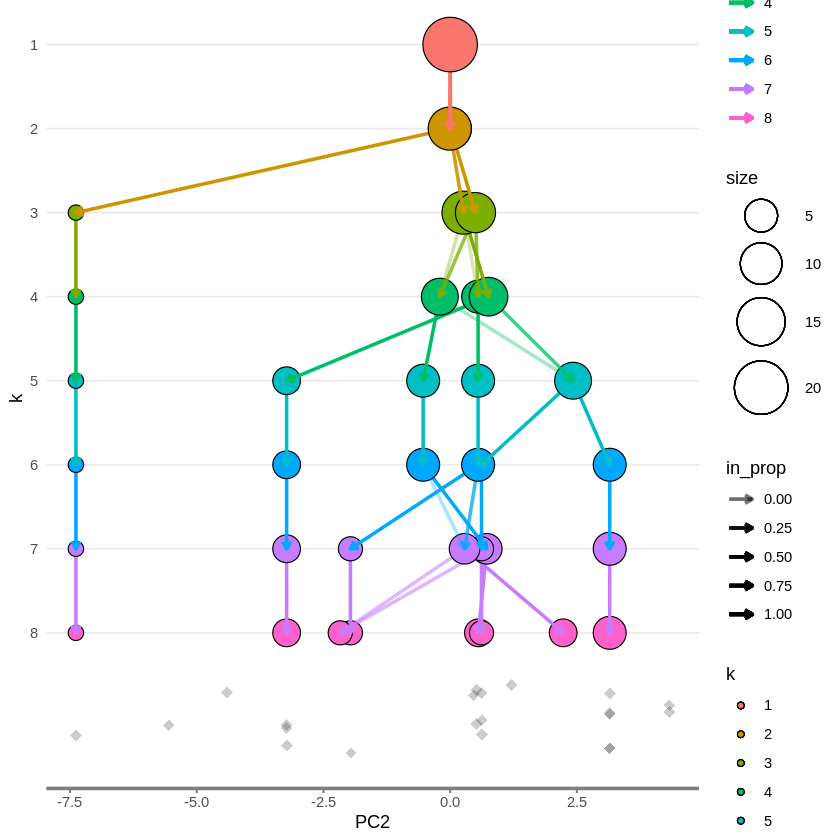

In [232]:
overlay_list <- clustree_overlay(df_subset, prefix = "k", x_value = "PC1",
                                 y_value = "PC2", plot_sides = TRUE)
overlay_list$x_side
overlay_list$y_side

In [233]:
intern <- clValid(mammals_scaled, nClust = 2:10, 
              clMethods = c("hierarchical","kmeans","pam"), validation = "internal")
# Summary
summary(intern) %>% kable() %>% kable_styling()

Warning message in clValid(mammals_scaled, nClust = 2:10, clMethods = c("hierarchical", :
“rownames for data not specified, using 1:nrow(data)”



Clustering Methods:
 hierarchical kmeans pam 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 

Validation Measures:
                                 2       3       4       5       6       7       8       9      10
                                                                                                  
hierarchical Connectivity   2.9290 10.3437 19.5143 23.6052 26.2242 30.2353 31.0687 34.7988 36.7155
             Dunn           0.6517  0.4219  0.4925  0.5586  0.5586  0.5024  0.5024  0.6545  0.6736
             Silhouette     0.3736  0.2020  0.1987  0.2632  0.2196  0.2198  0.2086  0.2416  0.2271
kmeans       Connectivity   2.9290 11.9337 20.6976 24.7885 28.5187 33.6964 36.0060 37.5583 39.4750
             Dunn           0.6517  0.3825  0.4465  0.5726  0.5403  0.4975  0.5829  0.6353  0.7062
             Silhouette     0.3736  0.2027  0.2145  0.2787  0.2835  0.2669  0.2522  0.2501  0.2504
pam          Connectivity  13.0964 19.2107 21.6385 23.6052 27.3353 30.0353 31.9520 34.4710 36.6139
   

<table class="table" style="margin-left: auto; margin-right: auto;">
<tbody>
  <tr>

  </tr>
</tbody>
</table>

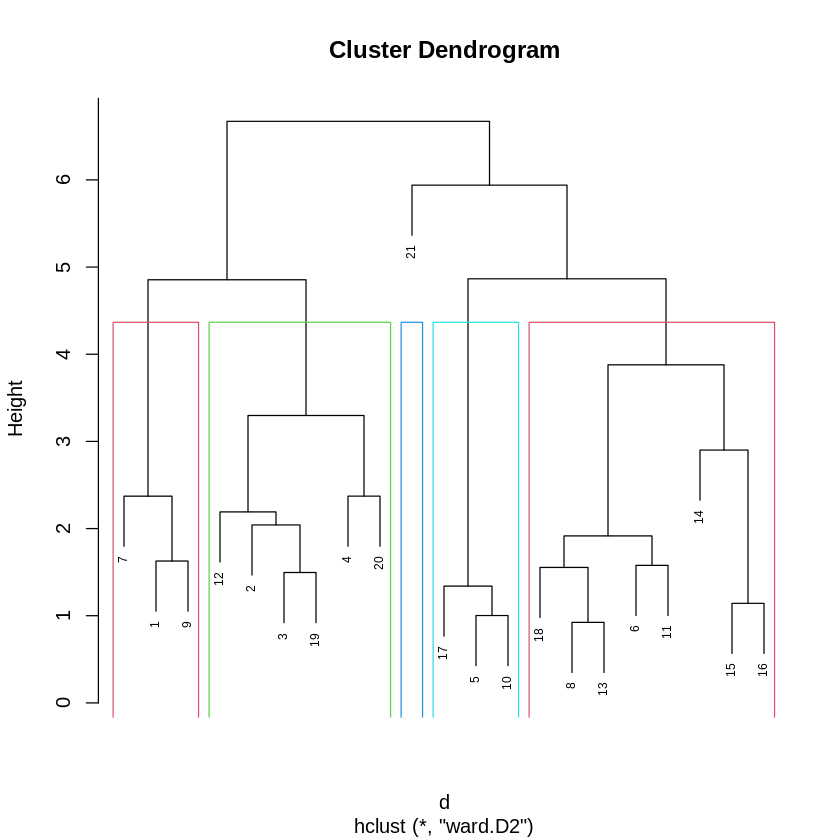

In [234]:
# Compute dissimilarity matrix with euclidean distances
d <- dist(mammals_scaled, method = "euclidean")
# Hierarchical clustering using Ward's method
res.hc <- hclust(d, method = "ward.D2" )
# Cut tree into 5 groups
grp <- cutree(res.hc, k = 5)
# Visualize
plot(res.hc, cex = 0.6) # plot tree
rect.hclust(res.hc, k = 5, border = 2:5) # add rectangle

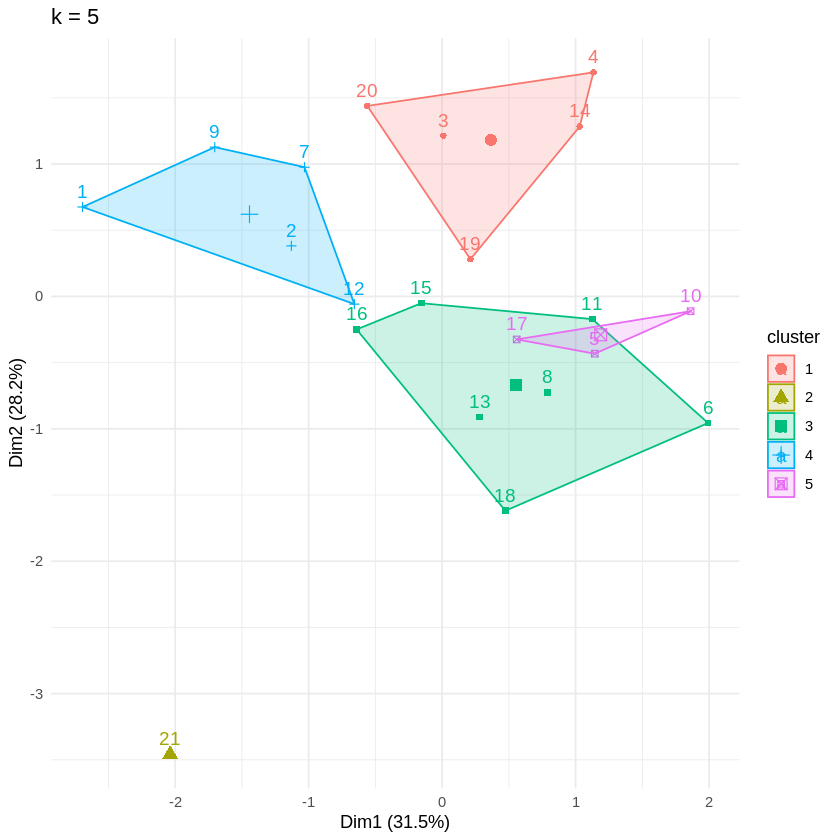

In [235]:
# Execution of k-means with k=5
final <- kmeans(mammals_scaled, 5, nstart = 30)
fviz_cluster(final, data = mammals_scaled) + theme_minimal() + ggtitle("k = 5")

In [237]:
as.data.frame(mammals_scaled) %>% mutate(Cluster = final$cluster) %>% group_by(Cluster) %>% summarise_all("mean") %>% kable() %>% kable_styling()

<table class="table" style="margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;"> Cluster </th>
   <th style="text-align:right;"> V1 </th>
   <th style="text-align:right;"> V2 </th>
   <th style="text-align:right;"> V3 </th>
   <th style="text-align:right;"> V4 </th>
   <th style="text-align:right;"> V5 </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0.1970780 </td>
   <td style="text-align:right;"> 1.3117240 </td>
   <td style="text-align:right;"> 0.6549914 </td>
   <td style="text-align:right;"> -0.1606930 </td>
   <td style="text-align:right;"> -0.4659927 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> -0.8198232 </td>
   <td style="text-align:right;"> -1.7890415 </td>
   <td style="text-align:right;"> -1.9189302 </td>
   <td style="text-align:right;"> -2.7485096 </td>
   <td style="text-align:right;"> 1.4145616 </td>
  </tr>
  <tr>

Joining, by = "rowname"



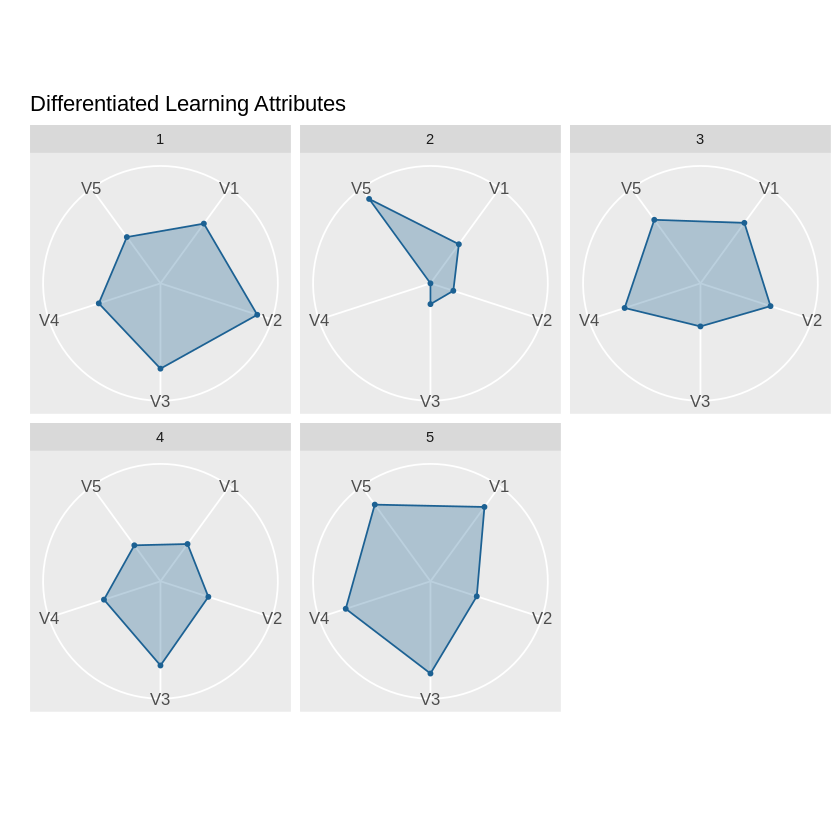

In [239]:
mammals_df <- as.data.frame(mammals_scaled) %>% rownames_to_column()
cluster_pos <- as.data.frame(final$cluster) %>% rownames_to_column()
colnames(cluster_pos) <- c("rowname", "cluster")
mammals_final <- inner_join(cluster_pos, mammals_df)
ggRadar(mammals_final[-1], aes(group = cluster), rescale = FALSE, legend.position = "none", size = 1, interactive = FALSE, use.label = TRUE) + facet_wrap(~cluster) + scale_y_discrete(breaks = NULL) + # don't show ticks
theme(axis.text.x = element_text(size = 10)) + scale_fill_manual(values = rep("#1c6193", nrow(mammals_final))) +
scale_color_manual(values = rep("#1c6193", nrow(mammals_final))) +
ggtitle("Differentiated Learning Attributes")

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
ERROR while rich displaying an object: Error in cor.test.default(x, y, method = method, use = use): not enough finite observations

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mi

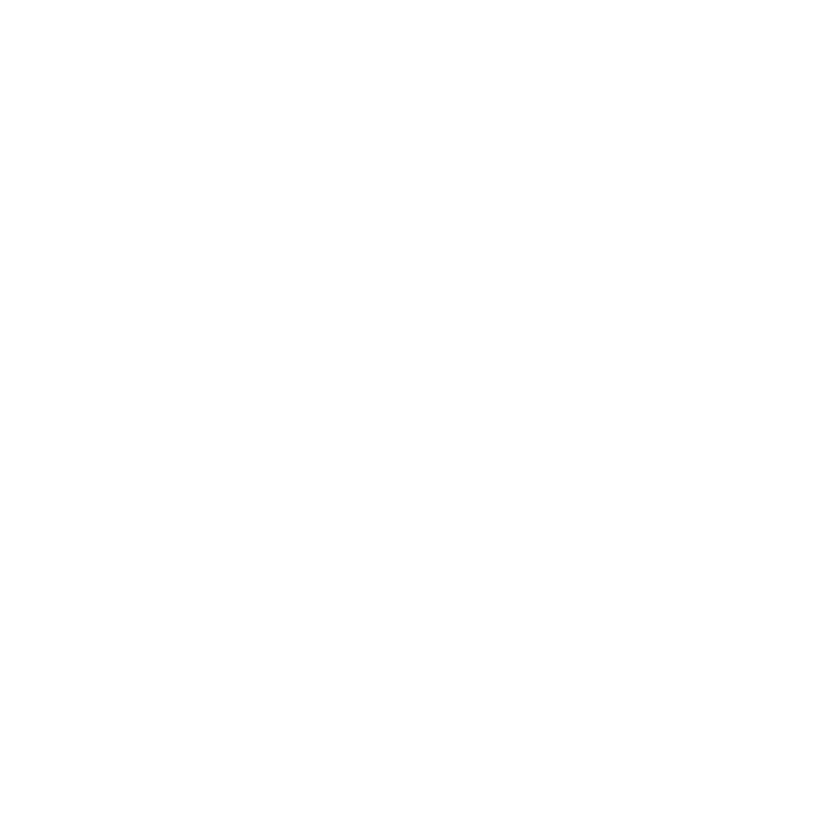

In [245]:
mammals_df <- as.data.frame(mammals_scaled)
mammals_df$cluster <- final$cluster
mammals_df$cluster <- as.character(mammals_df$cluster)
ggpairs(mammals_df, 1:5, mapping = ggplot2::aes(color = cluster, alpha = 0.5), 
        diag = list(continuous = wrap("densityDiag")), 
        lower=list(continuous = wrap("points", alpha=0.9)))

In [247]:
install.packages(c("ggExtra"), dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fontBitstreamVera’, ‘fontLiberation’, ‘fontquiver’




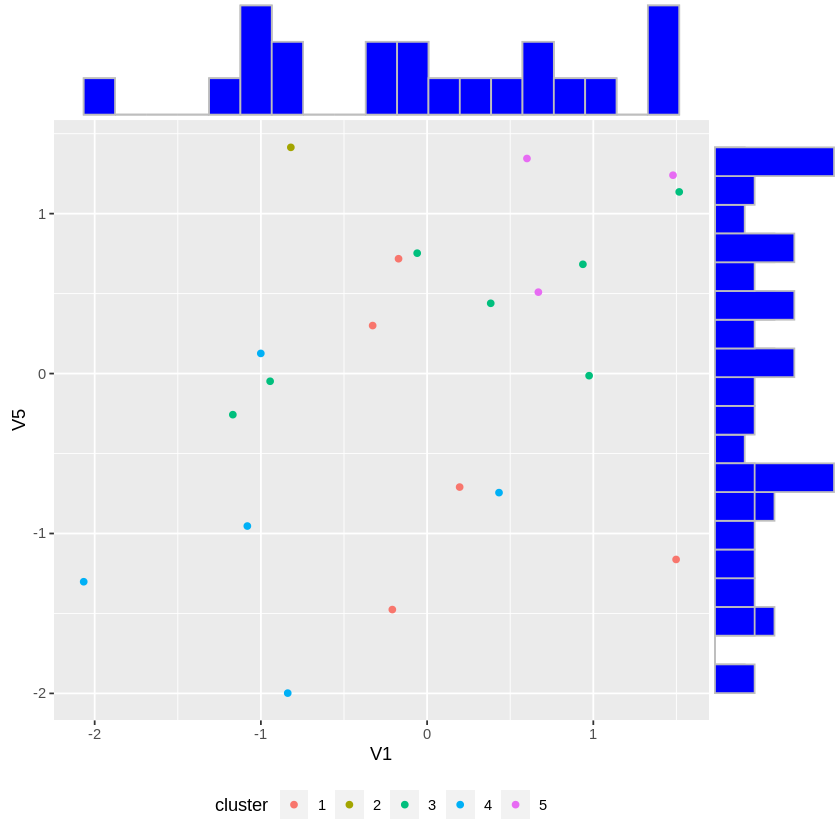

In [250]:
# plot specific graphs from previous matrix with scatterplot
g <- ggplot(mammals_df, aes(x = V1, y = V2, color = cluster)) +
        geom_point() +
        theme(legend.position = "bottom")
ggExtra::ggMarginal(g, type = "histogram", bins = 20, color = "grey", fill = "blue")
b <- ggplot(mammals_df, aes(x = V1, y = V5, color = cluster)) +
        geom_point() +
        theme(legend.position = "bottom")
ggExtra::ggMarginal(b, type = "histogram", bins = 20, color = "grey", fill = "blue")

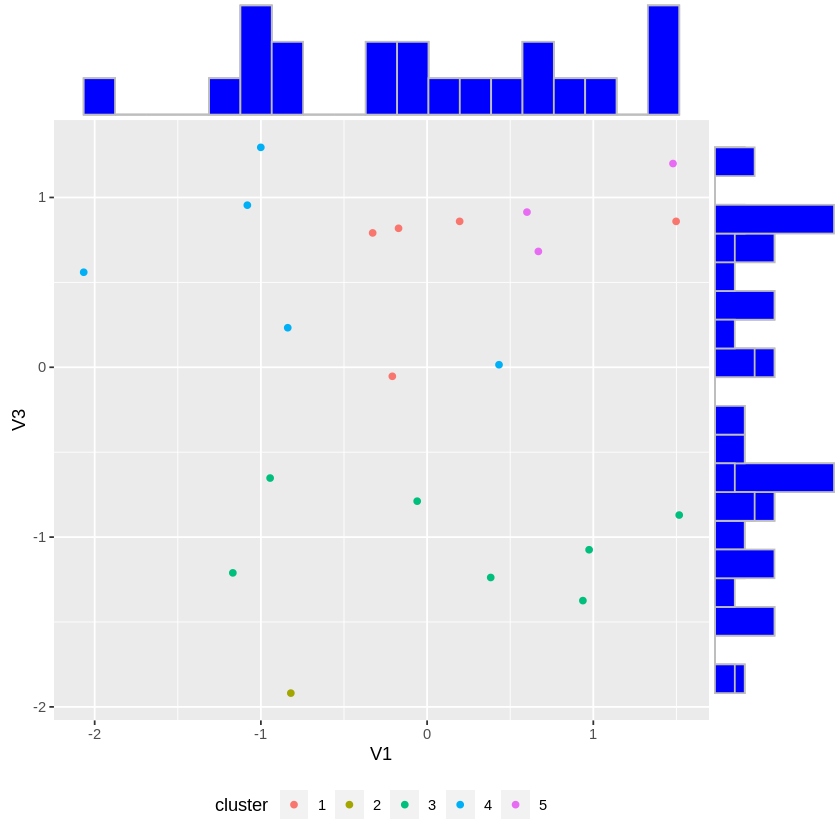

In [253]:
# plot specific graphs from previous matrix with scatterplot
ggExtra::ggMarginal(g, type = "histogram", bins = 20, color = "grey", fill = "blue")
g <- ggplot(mammals_df, aes(x = V1, y = V2, color = cluster)) +
        geom_point() +
        theme(legend.position = "bottom")
ggExtra::ggMarginal(g, type = "histogram", bins = 20, color = "grey", fill = "blue")
b <- ggplot(mammals_df, aes(x = V1, y = V3, color = cluster)) +
        geom_point() +
        theme(legend.position = "bottom")
ggExtra::ggMarginal(b, type = "histogram", bins = 20, color = "grey", fill = "blue")

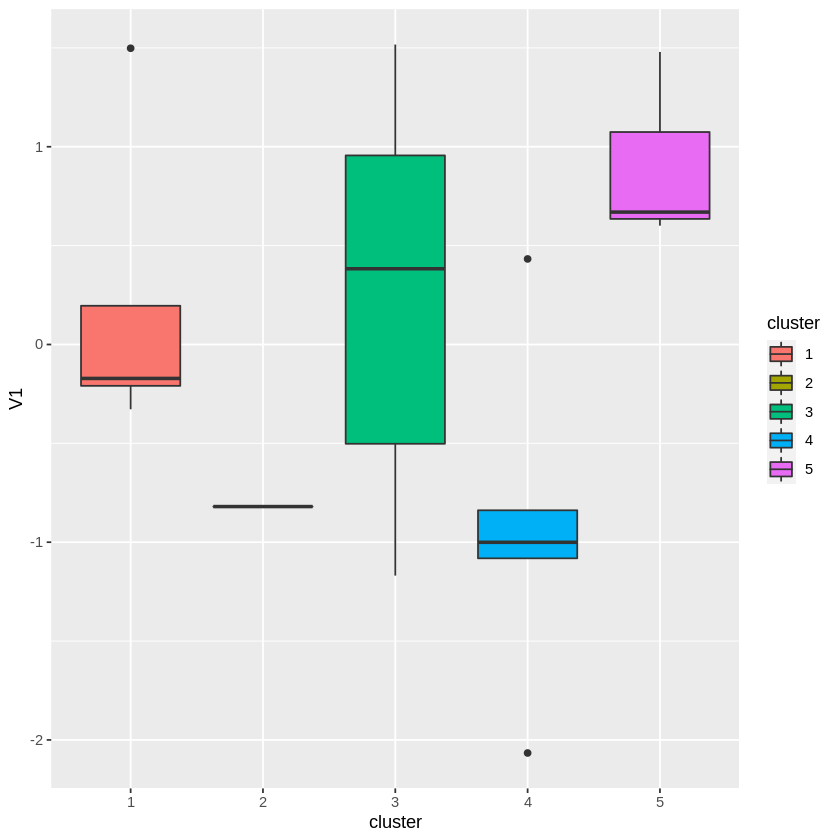

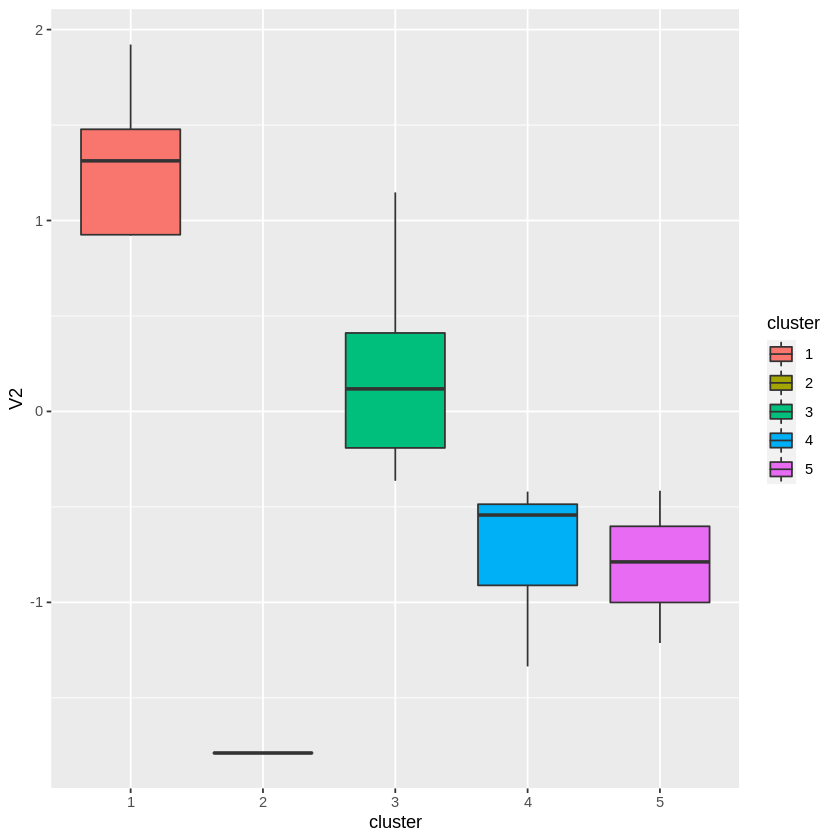

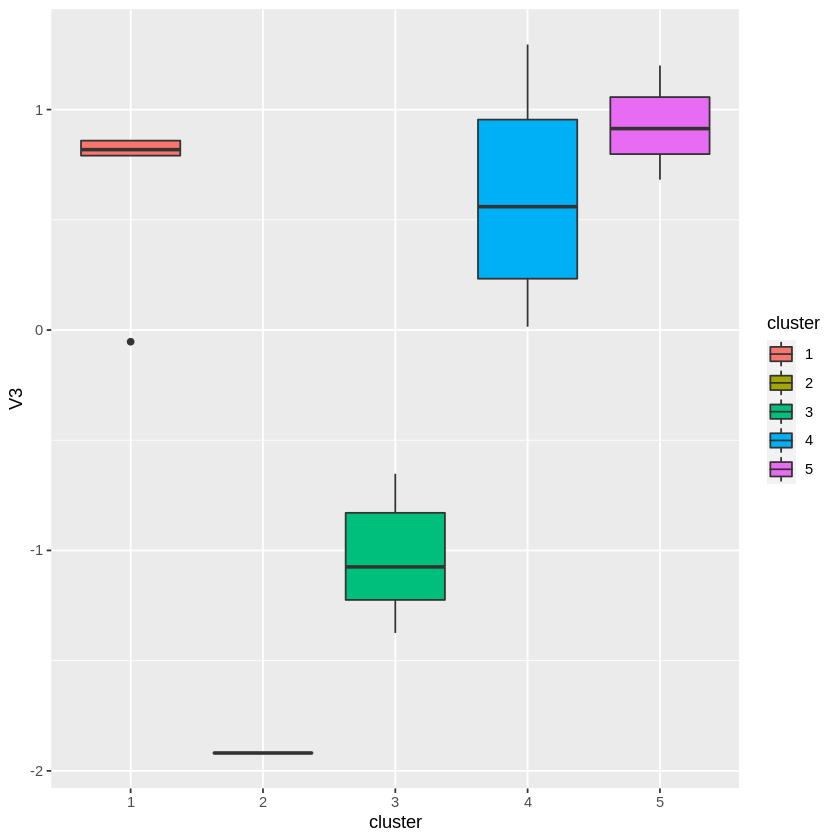

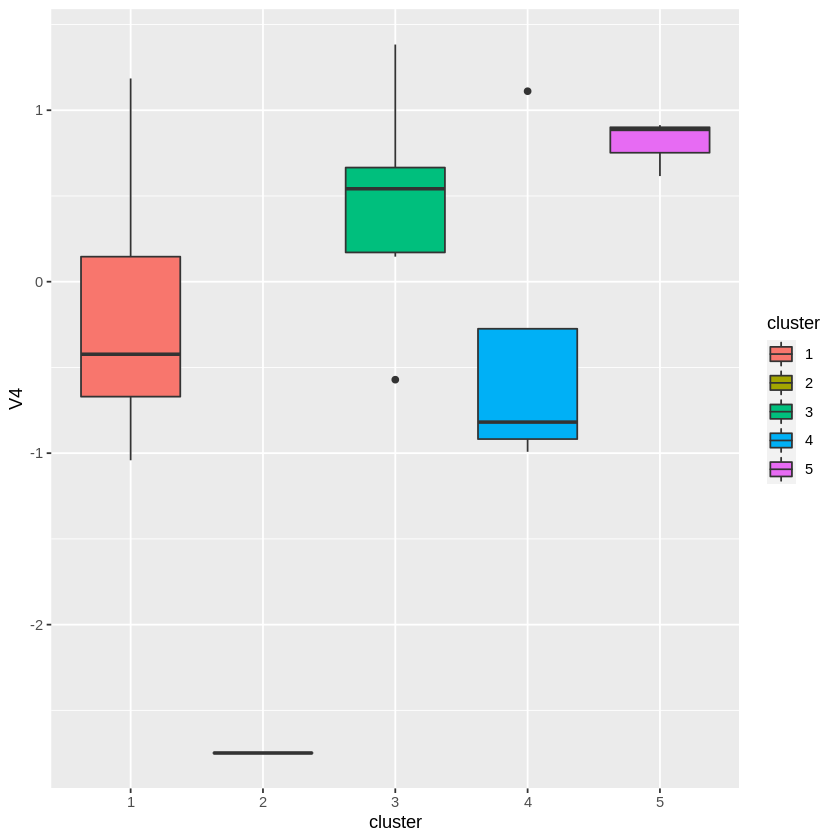

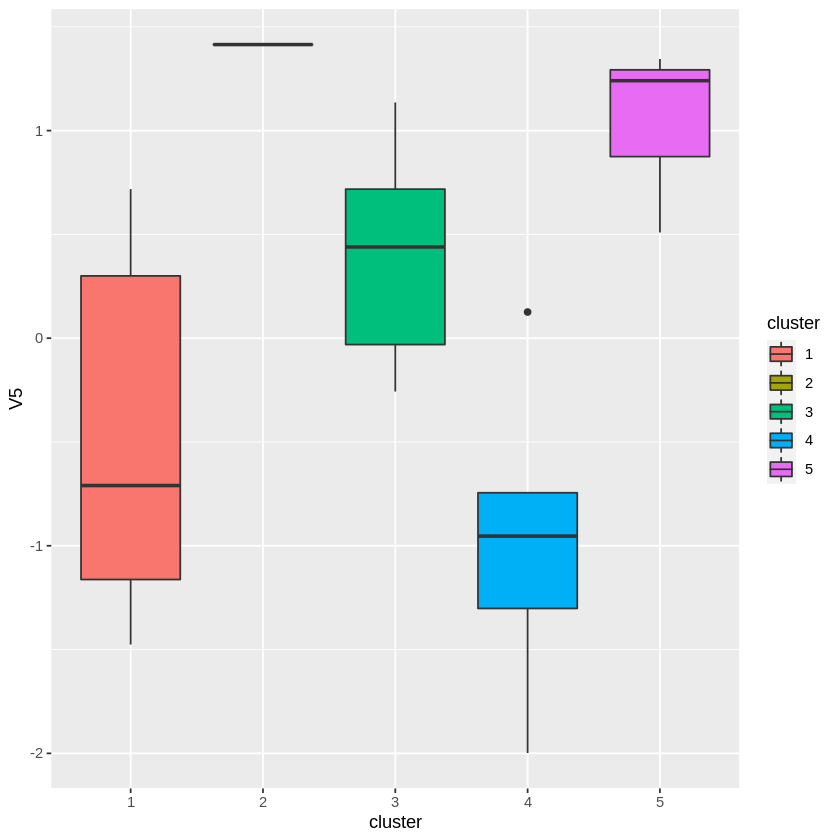

In [254]:
ggplot(mammals_df, aes(x = cluster, y = V1)) + 
        geom_boxplot(aes(fill = cluster))
ggplot(mammals_df, aes(x = cluster, y = V2)) + 
        geom_boxplot(aes(fill = cluster))
ggplot(mammals_df, aes(x = cluster, y = V3)) + 
        geom_boxplot(aes(fill = cluster))
ggplot(mammals_df, aes(x = cluster, y = V4)) + 
        geom_boxplot(aes(fill = cluster))
ggplot(mammals_df, aes(x = cluster, y = V5)) + 
        geom_boxplot(aes(fill = cluster))

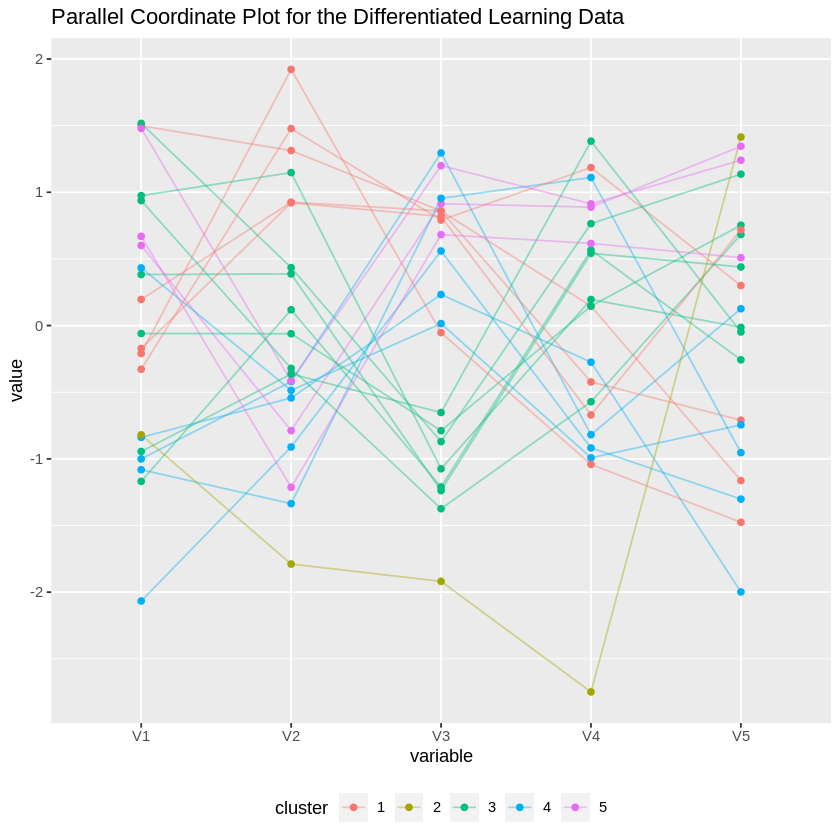

In [255]:
# Parallel coordiante plots allow us to put each feature on seperate column and lines connecting each column
ggparcoord(data = mammals_df, columns = 1:5, groupColumn = 6, alphaLines = 0.4, title = "Parallel Coordinate Plot for the Differentiated Learning Data", scale = "globalminmax", showPoints = TRUE) + theme(legend.position = "bottom")